In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import ast

In [2]:
DATASET = '../data/interim/so-questions-preproc.csv'

In [3]:
df = pd.read_csv(DATASET)

In [4]:
df_qs = df.copy()

In [5]:
df_qs.drop(['Unnamed: 0'], axis =1)

creation_date   user_id  reputation  view_count  \
0   2022-02-05 10:36:08   6709058          81          13   
1   2022-02-05 05:45:33   7116458          11          19   
2   2022-02-04 20:05:21  16389467          15          14   
3   2022-02-04 09:36:00  10030258         138          13   
4   2022-02-04 08:47:59  13000747          15          17   
..                  ...       ...         ...         ...   
95  2022-01-28 10:22:02   1983854      245036          25   
96  2022-01-28 10:19:00  18056092          13          31   
97  2022-01-28 05:12:39  14507451          31          23   
98  2022-01-27 23:30:16    273924        5337          30   
99  2022-01-27 22:33:17  15173118          15          48   

                                                title  \
0   Is there a way to allow non-root pods to write...   
1   how to create Snapshot &amp; Release Folder fo...   
2                  mocha: command not found in GitLab   
3   Cleaning up project directory and file based v...   
4   remote: The project you were looking for could...   
..                                                ...   
95  How can I assign an issue to a milestone autom...   
96                       Gitlab multiple folders rule   
97  GITLAB Warning - &#39;NO NSA Protected Informa...   
98  Why is GitLab CI SAST not exluding directories...   
99    Included file does not have a valid YAML syntax   

                                                 body  \
0   im trying to deploy gitlab to onpremises k8s c...   
1   i want to create snapshot amp release folder i...   
2   i want to try cicd so i am working on a simple...   
3   i started learning gitlabci using a course on ...   
4   im getting this error while trying to deploy m...   
..                                                ...   
95  i am using gitlab issue templates and they wor...   
96  are there ways to merge row changes of multipl...   
97  from past two weeks i am getting this warning ...   
98  i have enabled sast scanning in gitlab ci gitl...   
99  i am including a remote gitlabciyml file but c...   

                                            title_prc  \
0   ['is', 'there', 'a', 'way', 'to', 'allow', 'no...   
1   ['how', 'to', 'create', 'snapshot', '&', 'amp'...   
2   ['mocha', ':', 'command', 'not', 'found', 'in'...   
3   ['cleaning', 'up', 'project', 'directory', 'an...   
4   ['remote', ':', 'the', 'project', 'you', 'were...   
..                                                ...   
95  ['how', 'can', 'i', 'assign', 'an', 'issue', '...   
96          ['gitlab', 'multiple', 'folders', 'rule']   
97  ['gitlab', 'warning', '-', '&', '#', '39;no', ...   
98  ['why', 'is', 'gitlab', 'ci', 'sast', 'not', '...   
99  ['included', 'file', 'does', 'not', 'have', 'a...   

                                             body_prc  
0   ['i', 'm', 'trying', 'to', 'deploy', 'gitlab',...  
1   ['i', 'want', 'to', 'create', 'snapshot', 'amp...  
2   ['i', 'want', 'to', 'try', 'cicd', 'so', 'i', ...  
3   ['i', 'started', 'learning', 'gitlabci', 'usin...  
4   ['i', 'm', 'getting', 'this', 'error', 'while'...  
..                                                ...  
95  ['i', 'am', 'using', 'gitlab', 'issue', 'templ...  
96  ['are', 'there', 'ways', 'to', 'merge', 'row',...  
97  ['from', 'past', 'two', 'weeks', 'i', 'am', 'g...  
98  ['i', 'have', 'enabled', 'sast', 'scanning', '...  
99  ['i', 'am', 'including', 'a', 'remote', 'gitla...  

[100 rows x 8 columns]

### Initial token cloud using questions titles

In [6]:
# 1. convert Column to numpy array 
title_processed = df_qs['title_prc'].to_numpy()

In [7]:
# 2. Flatten the list of lists generated by step 1
title_corpus = [word for title_list in title_processed for word in ast.literal_eval(title_list)]

In [9]:
# 3. Create dictionary containing a key per each token and its respective frequency 

def count_token(token_list):
    count_token_dict = defaultdict()
    
    for token in token_list:
        if token in count_token_dict:
            count_token_dict[token] +=1
        else:
            count_token_dict[token] = 1
            
    return count_token_dict

token_freq = count_token(title_corpus)

In [13]:
# 4. Sort by value the previously created dictionary

token_freq_dsc = {key: value for key, value in sorted(token_freq.items(), key = lambda item: item[1], reverse=True)}

In [15]:
# 5. Initial word cloud with 100 words
word_cloud = WordCloud(background_color='white', min_word_length=2, max_words=100)
word_cloud.generate_from_frequencies(token_freq_dsc)

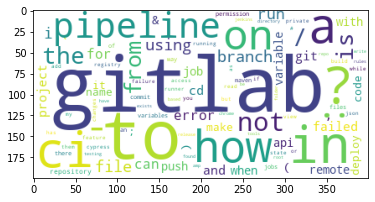

In [17]:
# 6. visualize using plt
plt.imshow(word_cloud)
plt.show()

#### Next iteration will be removing some stop words and using TF-IDF